# FedML

In [6]:
from model import CNN
from server import Server
import numpy as np
import warnings
import matplotlib.pyplot as plt
from utils import *

In [7]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")

## Experiment 01
In the first experiment we are comparing the accuracy of a fed ml approach including privacy 

In [24]:
# --- TRAINING PARAMETERS ---
# Number of distributed clients participating in the training process.
nr_clients = 3

# Learning Rate
lr = 0.01

# Number of client training epochs.
client_epochs = 10 

# Number of times the server is supposed to perform a global
# update step by aggregating the trained models from the clients.
nr_training_rounds = 20

is_parallel = False

data = "Med"  # or 'MNIST' or 'EMNIST'

# Batch sizes 
if data == "Med":
    batch_size = 10
elif data == "MNIST":
    batch_size = 128
else:
    raise NotImplementedError

In [27]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False

max_grad_norm = 1.2
epsilon = 5

epsilon_training_iteration = epsilon / nr_training_rounds
# DELTA = 1e-5

virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [28]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=True, patience=3, delta=0.05)

Round 1, test_loss: 5.0358, test_acc: 0.4583333333333333
Validation loss decreased (inf --> 5.035787).  Saving model ...
Round 2, test_loss: 3.1315, test_acc: 0.5416666666666666
Validation loss decreased (5.035787 --> 3.131544).  Saving model ...
Round 3, test_loss: 1.9352, test_acc: 0.5416666666666666
Validation loss decreased (3.131544 --> 1.935152).  Saving model ...
Round 4, test_loss: 2.2785, test_acc: 0.5416666666666666
EarlyStopping counter: 1 out of 3
Round 5, test_loss: 2.4039, test_acc: 0.4583333333333333
EarlyStopping counter: 2 out of 3
Round 6, test_loss: 1.7422, test_acc: 0.9166666666666666
Validation loss decreased (1.935152 --> 1.742203).  Saving model ...
Round 7, test_loss: 3.4306, test_acc: 0.4583333333333333
EarlyStopping counter: 1 out of 3
Round 8, test_loss: 2.1484, test_acc: 0.4583333333333333
EarlyStopping counter: 2 out of 3
Round 9, test_loss: 2.6301, test_acc: 0.5416666666666666
EarlyStopping counter: 3 out of 3
Early stopping
Test losses: [5.0358, 3.1315, 1

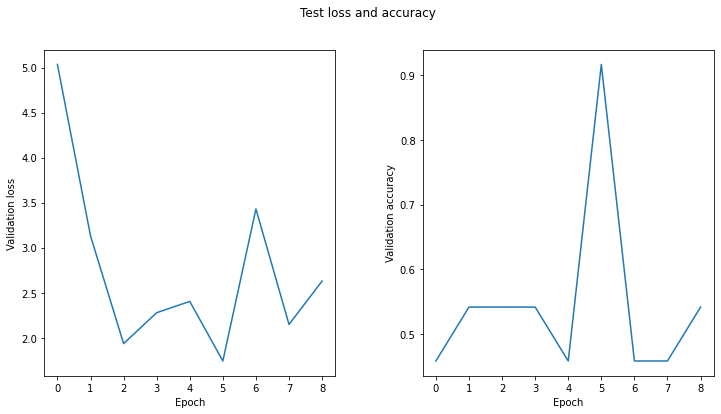

In [29]:
plot_metrics(test_losses, test_accs)

In [32]:
is_private=True
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=False, patience=3, delta=0.05)

Round 1, test_loss: 3.5342, test_acc: 0.4166666666666667
Round 2, test_loss: 2.9472, test_acc: 0.4166666666666667
Round 3, test_loss: 3.1924, test_acc: 0.4166666666666667
Round 4, test_loss: 2.9047, test_acc: 0.4166666666666667
Round 5, test_loss: 2.6363, test_acc: 0.4166666666666667
Round 6, test_loss: 2.5028, test_acc: 0.125
Round 7, test_loss: 2.5993, test_acc: 0.16666666666666666
Round 8, test_loss: 3.6917, test_acc: 0.4166666666666667
Round 9, test_loss: 2.6372, test_acc: 0.3333333333333333
Round 10, test_loss: 3.9295, test_acc: 0.4166666666666667
Round 11, test_loss: 3.7825, test_acc: 0.4166666666666667
Round 12, test_loss: 2.9147, test_acc: 0.4166666666666667
Round 13, test_loss: 4.1432, test_acc: 0.4166666666666667
Round 14, test_loss: 3.9848, test_acc: 0.4166666666666667
Round 15, test_loss: 5.3252, test_acc: 0.4166666666666667
Round 16, test_loss: 5.9021, test_acc: 0.4166666666666667
Round 17, test_loss: 8.5031, test_acc: 0.4166666666666667
Round 18, test_loss: 8.6358, test_a

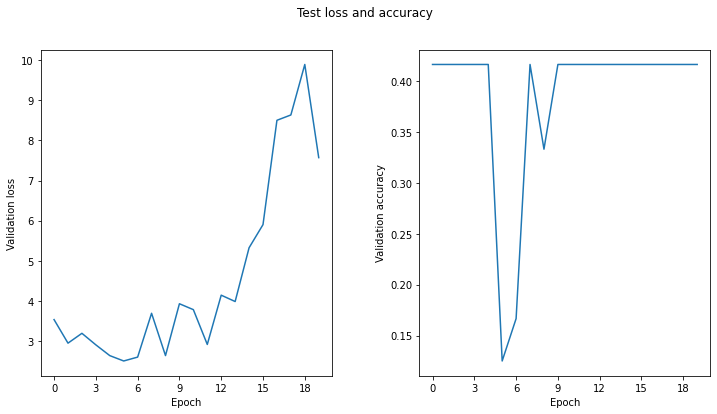

In [33]:
plot_metrics(test_losses, test_accs)

## Experiment 02

In [48]:
# --- TRAINING PARAMETERS ---
# Number of distributed clients participating in the training process.
nr_clients = 3

# Learning Rate
lr = 0.01

# Number of client training epochs.
client_epochs = 10 

# Number of times the server is supposed to perform a global
# update step by aggregating the trained models from the clients.
nr_training_rounds = 20

is_parallel = True

data = "MNIST"

# Batch sizes 
if data == "Med":
    batch_size = 10
elif data == "MNIST":
    batch_size = 128
else:
    raise NotImplementedError

In [49]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = True

max_grad_norm = 1.2
epsilon = 5

epsilon_training_iteration = epsilon / nr_training_rounds
# DELTA = 1e-5

virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [ ]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private)
test_losses, test_accs = server(early=True, patience=5, delta=0.05)

3
[Client 0]	Using sigma=7.223188476562501 and C=1.2
[Client 1]	Using sigma=7.223188476562501 and C=1.2
[Client 2]	Using sigma=7.223188476562501 and C=1.2
[Client 1]	Train Epoch: 0	Loss: 2.2666
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 2]	Train Epoch: 0	Loss: 2.2960
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 0]	Train Epoch: 0	Loss: 2.2826
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 1]	Train Epoch: 0	Loss: 2.2818
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 0]	Train Epoch: 0	Loss: 2.2655
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 2]	Train Epoch: 0	Loss: 2.2936
	(ε = 0.18, δ = 2.5e-05) for α = 63.0
[Client 1]	Train Epoch: 1	Loss: 2.2680
	(ε = 0.19, δ = 2.5e-05) for α = 63.0
[Client 0]	Train Epoch: 1	Loss: 2.2710
	(ε = 0.19, δ = 2.5e-05) for α = 63.0
[Client 2]	Train Epoch: 1	Loss: 2.2548
	(ε = 0.19, δ = 2.5e-05) for α = 63.0
[Client 1]	Train Epoch: 1	Loss: 2.2851
	(ε = 0.19, δ = 2.5e-05) for α = 63.0
[Client 0]	Train Epoch: 1	Loss: 2.2497
	(ε = 0.19, δ = 2.5e-05) for α = 63.

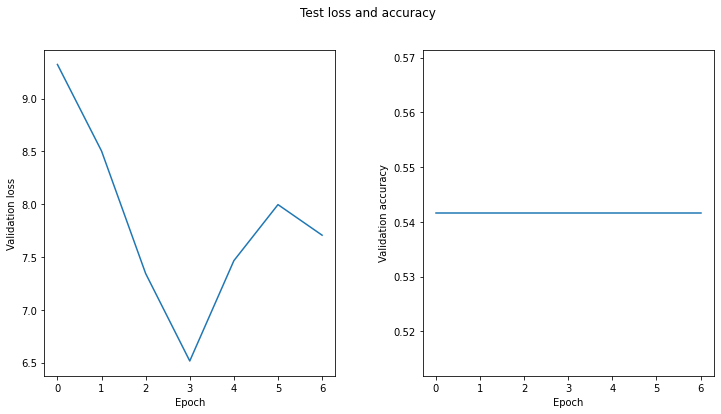

In [41]:
plot_metrics(test_losses, test_accs)

## Experiment 03

In [8]:
import tensorflow as tf
import tensorflow_federated as tff

KeyboardInterrupt: 

In [ ]:
# --- TRAINING PARAMETERS ---
# Number of distributed clients participating in the training process.
nr_clients = 3

# Learning Rate
lr = 0.01

# Number of client training epochs.
client_epochs = 3

# Number of times the server is supposed to perform a global
# update step by aggregating the trained models from the clients.
nr_training_rounds = 3

is_parallel = True

data = "FEMNIST"

# Batch sizes 
if data == "Med":
    batch_size = 10
elif data == "MNIST":
    batch_size = 128
elif data == "FEMNIST":
    batch_size = 128
else:
    raise NotImplementedError

In [9]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False

max_grad_norm = 1.2
epsilon = 5

epsilon_training_iteration = epsilon / nr_training_rounds
# DELTA = 1e-5

virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [10]:
print("Training on {0}".format(data))
print("is_parallel: {0}".format(is_parallel))
print("is_private: {0}".format(is_private))
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private)
test_losses, test_accs = server(early=False, patience=5, delta=0.05)

Training on EMNIST
is_parallel: True
is_private: False
3
called global update
[Client 0]	Train Epoch: 0	Loss: 0.1928
[Client 2]	Train Epoch: 0	Loss: 0.2853
[Client 1]	Train Epoch: 0	Loss: 0.3492
[Client 2]	Train Epoch: 1	Loss: 0.1126
[Client 0]	Train Epoch: 1	Loss: 0.2553
[Client 1]	Train Epoch: 1	Loss: 0.2269
[Client 1]	Train Epoch: 2	Loss: 0.1796
Client 1 - done
[Client 2]	Train Epoch: 2	Loss: 0.2278
Client 2 - done
[Client 0]	Train Epoch: 2	Loss: 0.1748
Client 0 - done


NotImplementedError: 

## Experiment 04

In [8]:
# --- TRAINING PARAMETERS ---
# Number of distributed clients participating in the training process.
nr_clients = 3

# Learning Rate
lr = 0.01

# Number of client training epochs.
client_epochs = 3

# Number of times the server is supposed to perform a global
# update step by aggregating the trained models from the clients.
nr_training_rounds = 3

is_parallel = True

data = "FEMNIST"

# Batch sizes 
if data == "Med":
    batch_size = 10
elif data == "MNIST":
    batch_size = 128
elif data == "FEMNIST":
    batch_size = 128
else:
    raise NotImplementedError

In [9]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False

max_grad_norm = 1.2
epsilon = 5

epsilon_training_iteration = epsilon / nr_training_rounds
# DELTA = 1e-5

virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [10]:
print("Training on {0}".format(data))
print("is_parallel: {0}".format(is_parallel))
print("is_private: {0}".format(is_private))
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private)
test_losses, test_accs = server(early=False, patience=5, delta=0.05)

Training on FEMNIST
is_parallel: True
is_private: False
3
init femnist
Starting To Load Training Data
<_io.TextIOWrapper name='./data/FEMNIST/train/femnist-9.json' mode='r' encoding='UTF-8'>
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Finished Loading Training Data
<_io.TextIOWrapper name='./data/FEMNIST/test/femnist-5.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='./data/FEMNIST/test/femnist-4.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='./data/FEMNIST/test/femnist-3.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='./data/FEMNIST/test/femnist-2.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='./data/FEMNIST/test/femnist-1.json' mode='r' encoding='UTF-8'>


Exception in thread Thread-8:
Traceback (most recent call last):
  File "/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jankreischer/Documents/University/Master/Semester-03_Summer-2021/Optimisation-for-Machine-Learning/Assignment/Code/src/client.py", line 74, in train
    output = self.model(images)
  File "/Users/jankreischer/opt/anaconda3/envs/EPFL_Optimization-for-Machine-Learning/lib/python3.8/site-packages/torch/nn/modules/module.py", line 889, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/Users/jankreischer/Documents/University/Master/Semester-03_Summer-2021/Optimisation-for-Machine-Learning/Assignment/Code/src/model.py", line 18, in forward
    x = self.conv1(x)
  F

called global update


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 3, 3], but got 2-dimensional input of size [64, 784] instead